In [12]:
import os, sys, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
gparentdir = os.path.dirname(os.path.dirname(currentdir))
sys.path.insert(0, gparentdir)
import scobra
import get_all_functions as gaf
import re
n = scobra.Model("sample/Supplemental-Data-S1_Core-Leaf-Model.xml")
m = scobra.model(n)

cobra/core/reaction.py:394 UserWarning: malformed gene_reaction_rule '(  )' for <Reaction HEXOKINASE_RXN_MANNOSE_c2 at 0x7f63f4c9de50>
cobra/core/reaction.py:394 UserWarning: malformed gene_reaction_rule '(  )' for <Reaction HEXOKINASE_RXN_MANNOSE_c1 at 0x7f63f8e38e50>


In [13]:
m.Reactions() 

['SUPEROX_DISMUT_RXN_c2',
 'SUPEROX_DISMUT_RXN_c1',
 'MAL_PROTON_vc2',
 'H2O_xc1',
 'SERINE_O_ACETTRAN_RXN_c2',
 'SERINE_O_ACETTRAN_RXN_c1',
 '6PGLUCONOLACT_RXN_c2',
 'Ca_tx1',
 '6PGLUCONOLACT_RXN_c1',
 'Ca_tx2',
 'RXN66_1_c2',
 'RXN66_1_c1',
 'GLY_xc2',
 'GLY_xc1',
 'RXN_9653_p2',
 'SUCROSE_PROTON_rev_vc1',
 'RXN_9653_p1',
 'NADPPHOSPHAT_RXN_c1',
 'NADPPHOSPHAT_RXN_c2',
 'SUCROSE_PROTON_rev_vc2',
 'PRO_PROTON_vc2',
 'PYRUVATE_PROTON_mc2',
 'CYTOCHROME_C_OXIDASE_RXN_mi1',
 'SUC_FUM_mc1',
 'O2_mc1',
 'PRO_PROTON_vc1',
 'PYRUVATE_PROTON_mc1',
 'O2_mc2',
 'GLYCERATE_GLYCOLLATE_pc2',
 'CYTOCHROME_C_OXIDASE_RXN_mi2',
 'GLYCERATE_GLYCOLLATE_pc1',
 'CITSYN_RXN_x2',
 'ATP_pc2',
 'CITSYN_RXN_x1',
 'sCIT_biomass1',
 'sCIT_biomass2',
 'H2O_xc2',
 'ATP_pc1',
 'CIT_PROTON_rev_vc2',
 'CIT_PROTON_rev_vc1',
 'MAL_PROTON_vc1',
 'PEP_Pi_pc1',
 'PEP_Pi_pc2',
 'SUC_FUM_mc2',
 'THR_PROTON_rev_vc1',
 '2OXOGLUTARATEDEH_RXN_m2',
 'MANNPGUANYLTRANGDP_RXN_c1',
 'THR_PROTON_vc1',
 'RXN0_5184_c1',
 'MANNPGUANYLTR

In [14]:
import scobra.classes.flux as flux
import scobra.classes.matrix as matrix

In [15]:
f = flux.flux({'H2O_ec1':100, 'SUPEROX_DISMUT_RXN_c2': 200, 'RXN66_1_c1': 300})
mat = matrix.matrix({"Flux": f})

In [16]:
thefile = enumerate(open(gparentdir + "/scobra/classes/matrix.py"))
flist = gaf.get_function_names_easy(thefile)

['__init__', 'Copy', 'FromFile', 'ToFile', 'Plot', 'VaryReacs', 'FixedReacs', 'NonZeroes', 'ZeroReac', 'AverageFlux', 'FluxRange', 'DicUpdate', 'UpdateFromDic', 'ResponseCoef', 'PrintResponseCoef', 'FluxCorrCoefMtx', 'FluxCorrCoef', 'PrintFluxCorrCoef', 'StDev', 'PrintSD', 'RelStDev', 'PrintRSD', 'AverageDev', 'PrintAD', 'RelAverageDev', 'PrintRAD', 'AsDic', 'PrintSorted']


In [17]:
flist = ['__init__', 'Copy', 'FromFile', 'ToFile', 'Plot', 'VaryReacs', 'FixedReacs', 'NonZeroes', 'ZeroReac', 'AverageFlux',
         'DicUpdate', 'UpdateFromDic', 'FluxCorrCoefMtx', 'FluxCorrCoef',
         'PrintFluxCorrCoef', 'StDev', 'PrintSD', 'RelStDev', 'PrintRSD', 'AverageDev', 'PrintAD', 'RelAverageDev',
         'PrintRAD', 'AsDic', 'PrintSorted']

errors = []
for i in flist: 
    try:
        print('executing ' + i)
        exec("mat." + i + "()")
    except TypeError: 
        errors.append(i)
errors = errors +  ['FluxRange', 'ResponseCoef', 'PrintResponseCoef']

executing __init__
executing Copy
executing FromFile
executing ToFile
executing Plot
executing VaryReacs
executing FixedReacs
executing NonZeroes
executing ZeroReac
executing AverageFlux
executing DicUpdate
executing UpdateFromDic
executing FluxCorrCoefMtx
executing FluxCorrCoef
executing PrintFluxCorrCoef
executing StDev
executing PrintSD
executing RelStDev
executing PrintRSD
executing AverageDev
executing PrintAD
executing RelAverageDev
executing PrintRAD
executing AsDic
executing PrintSorted


In [18]:
mat = matrix.matrix({"Flux": f})
mat.DicUpdate({"Flux2": 'test'})
mat.UpdateFromDic({"Flux2": 'test'})

,Flux,Flux2
0,100.0,0
1,300.0,0
2,200.0,0
3,0.0,test


In [19]:
mat = matrix.matrix({"Flux": f})
mat2 = mat
mat.FluxCorrCoef('Flux')
mat.PrintFluxCorrCoef('Flux')
mat.StDev('Flux')
mat.RelStDev('Flux')
mat.AverageDev('Flux')
mat.RelAverageDev('Flux')
mat.PrintSorted({'H2O_ec1':100})

Flux: 1.0
H2O_ec1: 100


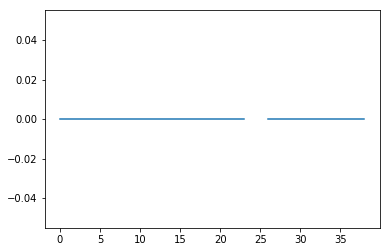

In [20]:
path = "sample/sample_chloroplast.xls"
mat = mat.FromFile(path)
#mat.ToFile("/home/kristoforus/Desktop/test.xls")
try: 
    mat.Plot('Objective')
except ImportError as e: 
    print(e + "\nThis module cannot be installed in the virtual environment. Using Jupyter Notebook resolves this problem.")

In [21]:
# mat.FluxRange() doesn't work due to the incompatible data structure demanded by fva functions
mat.columns

Index([u'Abbreviation', u'Description', u'Reaction', u'GPR', u'Genes',
       u'Proteins', u'Subsystem', u'Reversible', u'Lower bound',
       u'Upper bound', u'Objective', u'Confidence Score', u'EC Number',
       u'Notes', u'References'],
      dtype='object')

In [23]:
mat = matrix.matrix({"Flux": f})
mat.ResponseCoef()
mat.PrintResponseCoef()

Flux: 0.0


In [24]:
print('Test Completed')

Test Completed.
